In [1]:
import pandas as pd                         # type: ignore
import yfinance as yf                       # type: ignore
import matplotlib.pyplot as plt             # type: ignore

from datetime import datetime as dt

## load data

In [2]:
df_tesla = yf.download('TSLA')
len(df_tesla), df_tesla.columns

[*********************100%%**********************]  1 of 1 completed


(3543,
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'))

In [3]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400
2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200
2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900


In [4]:
type(df_tesla) # type: ignore

pandas.core.frame.DataFrame

## plot basic graphs

<Axes: xlabel='Date'>

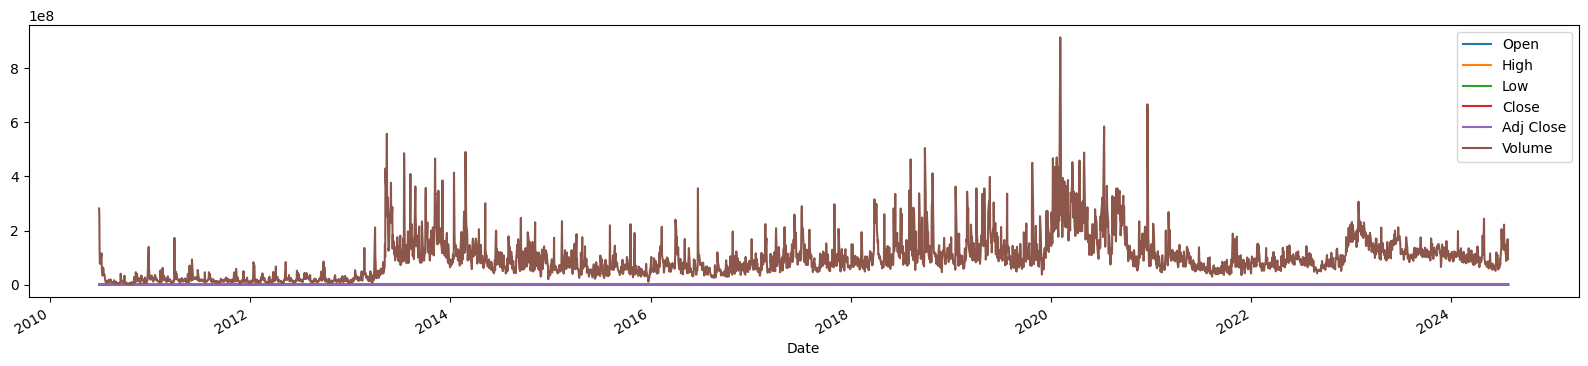

In [8]:
df_tesla.plot(figsize=(20, 4))

<Axes: xlabel='Date'>

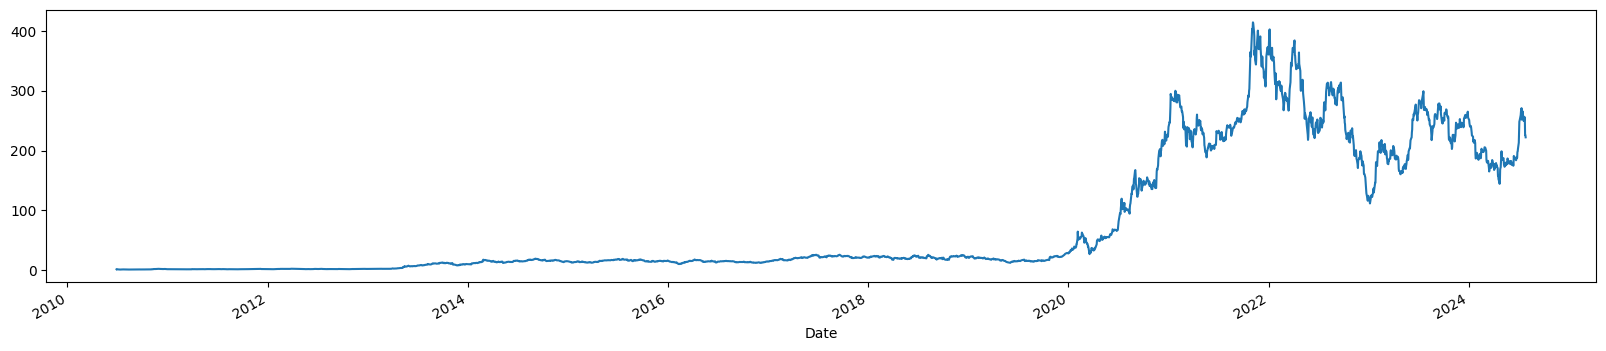

In [9]:
df_tesla['High'].plot(figsize=(20, 4))

<Axes: xlabel='Date'>

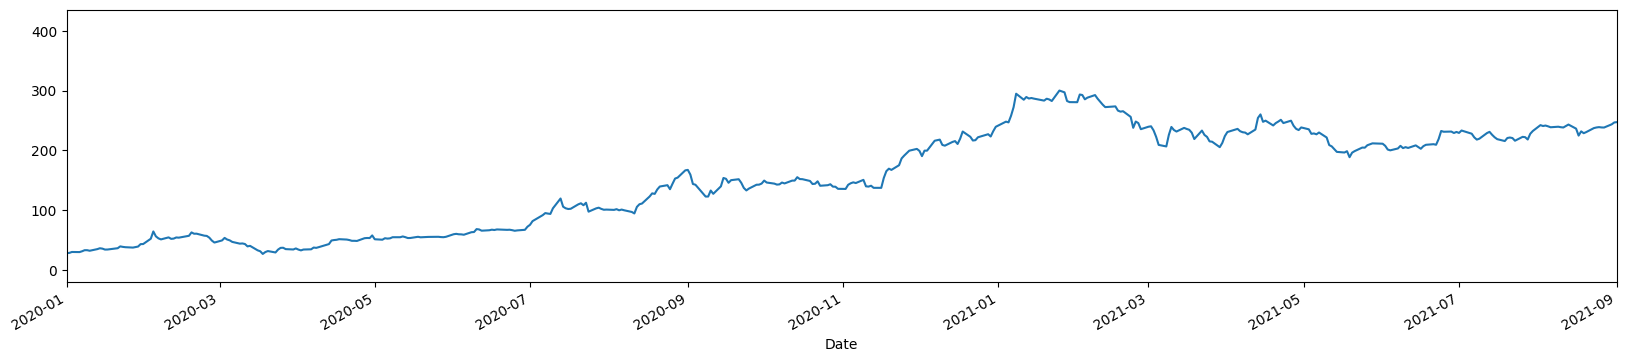

In [10]:
# xlimit and ylimit - so, can see the graph clearly
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], figsize=(20, 4))

<Axes: xlabel='Date'>

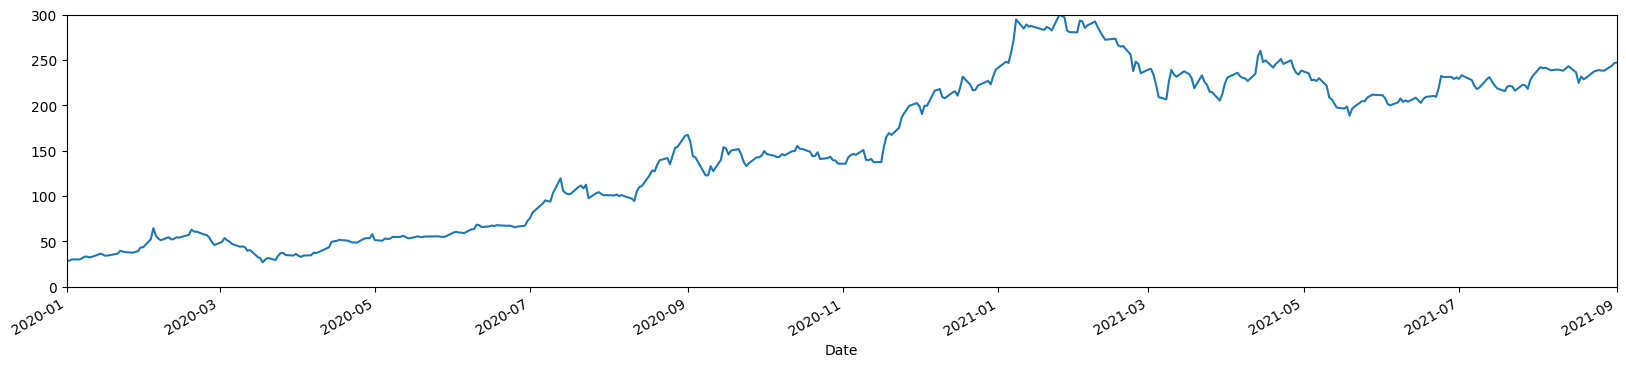

In [13]:
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 300], figsize=(20, 4))

<Axes: xlabel='Date'>

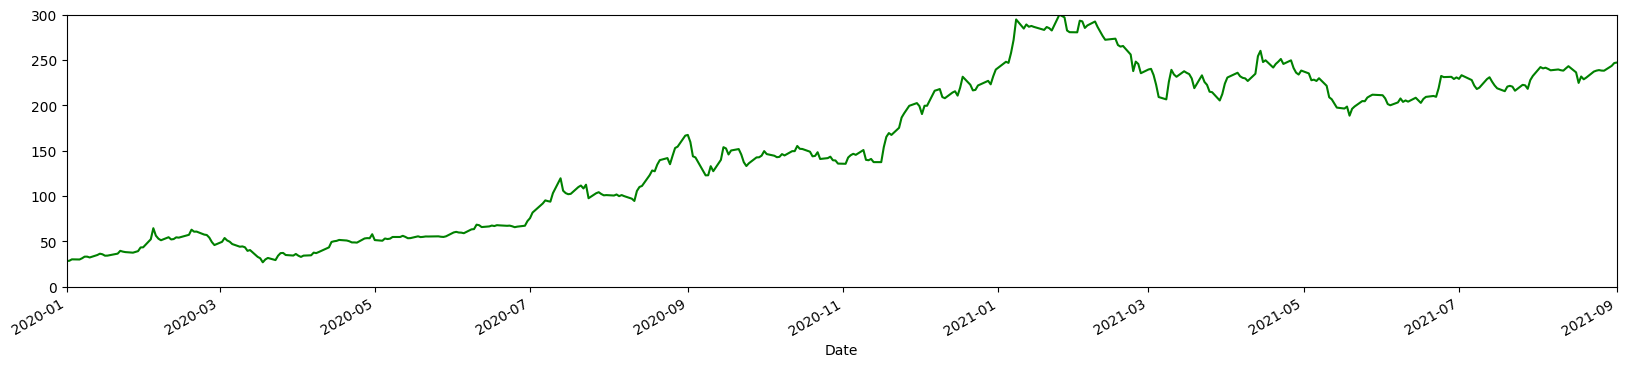

In [16]:
# apply colouring
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 300], figsize=(20, 4), c='green')

<Axes: xlabel='Date'>

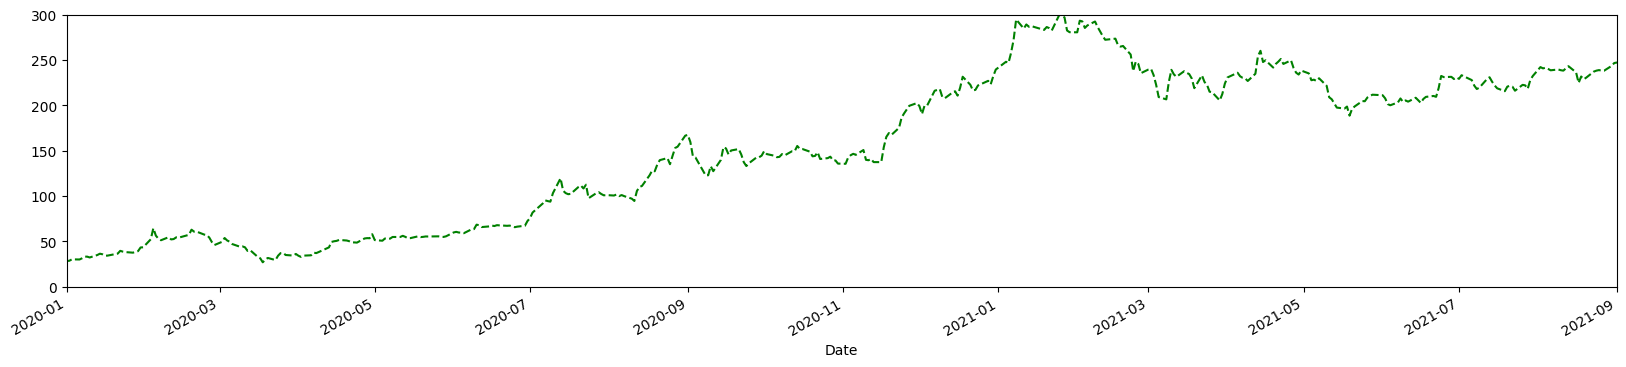

In [17]:
# add doted lines
df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 300], figsize=(20, 4), ls='--', c='green')

## data retrival

In [18]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26'],
              dtype='datetime64[ns]', name='Date', length=3543, freq=None)

In [21]:
idx = df_tesla.loc['2020-01-01': '2021-09-01'].index
idx

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [22]:
share_open = df_tesla.loc['2020-01-01': '2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

## sub plots

In [23]:
%matplotlib inline

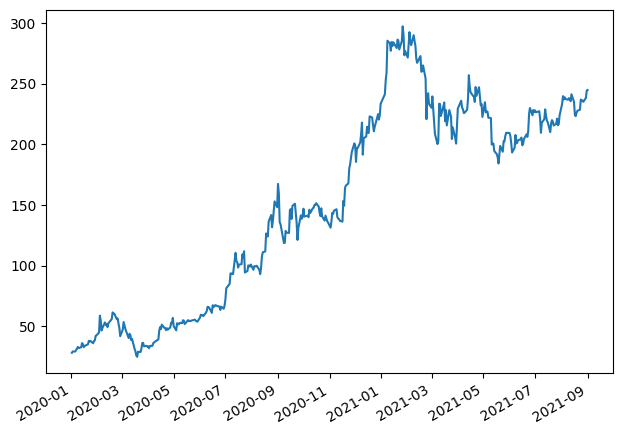

In [26]:
figure, axis = plt.subplots()
plt.tight_layout()

# preventing x-axis labels overlapping
figure.autofmt_xdate()

axis.plot(idx, share_open)